In [1]:
# 现在的数据是图片，本质ndarray
# 将图片进行量化，数字
import numpy as np

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

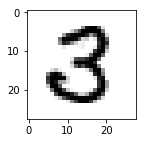

In [10]:
digit = plt.imread('./data/3/3_436.bmp')
plt.figure(figsize=(2,2))
plt.imshow(digit,cmap = plt.cm.gray)

In [ ]:
# 数据挖掘 = 机器学习
# 手写数字的识别
# 图片变成数据

In [11]:
X = []
y = []
for i in range(10):
    for j in range(1,501):
        data = plt.imread('./data/%d/%d_%d.bmp'%(i,i,j))
        X.append(data)
        y.append(i)
X = np.asarray(X)
y = np.asarray(y)
display(X.shape,y.shape)

(5000, 28, 28)

(5000,)

In [12]:
knn = KNeighborsClassifier()
knn.fit(X,y)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [15]:
X.reshape(5000,28*28)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [17]:
X = X.reshape(5000,-1)

In [18]:
X.shape

(5000, 784)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [21]:
%%time
knn = KNeighborsClassifier(n_neighbors= 5)

knn.fit(X_train,y_train)

y_ = knn.predict(X_test)

print('邻居数量是5的时候，准确率：',accuracy_score(y_test,y_))

邻居数量是5的时候，准确率： 0.918
Wall time: 4.33 s


In [25]:
%%time
knn = KNeighborsClassifier(n_neighbors= 15)

knn.fit(X_train,y_train)

y_ = knn.predict(X_test)

print('邻居数量是5的时候，准确率：',accuracy_score(y_test,y_))

邻居数量是5的时候，准确率： 0.906
Wall time: 4.22 s


### KNN

In [ ]:
# 1、计算所有点的距离（耗时操作）

In [ ]:
# 2、排序（不是耗时操作）

In [ ]:
# 3、选择最小k个邻居（不是耗时操作）

In [ ]:
# 4、查看邻居类别，类别多（类别权重大），根据概率进行划分

In [27]:
knn.fit(X_train,y_train)
knn.predict(X_test[:10])

array([6, 4, 2, 3, 5, 0, 9, 2, 0, 2])

In [28]:
proba_ = knn.predict_proba(X_test[:10])
proba_

array([[0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0.2, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0.2, 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [29]:
proba_.argmax(axis =1)

array([6, 4, 2, 3, 5, 0, 9, 2, 0, 2], dtype=int64)

### 数据的可视化


In [30]:
y_ = knn.predict(X_test[:40])

In [32]:
X_test[0].shape

(784,)

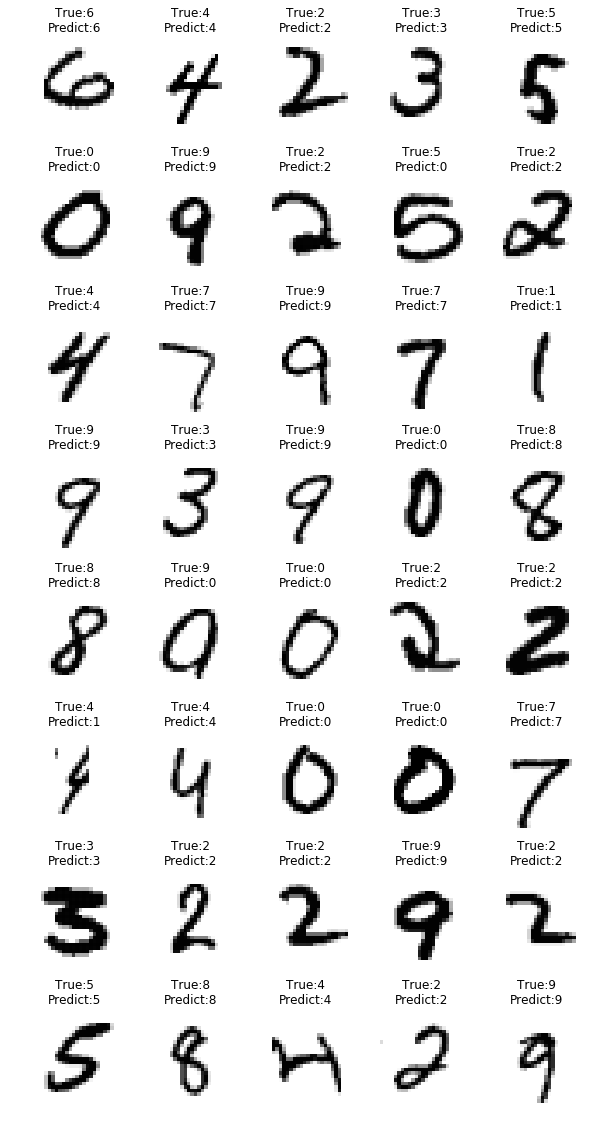

In [37]:
# 8行5列
plt.figure(figsize=(5*2,2.5*8))
for i in range(40):
    ax = plt.subplot(8,5,i + 1)
    ax.imshow(X_test[i].reshape(28,28),cmap = plt.cm.gray)
    ax.axis('off')
    t = y_test[i]
    p = y_[i]
    ax.set_title('True:%d\nPredict:%d'%(t,p))